<a href="https://colab.research.google.com/github/HumbertoMezaRuiz/FisicaComputacional1/blob/main/Evaluation1/Evaluation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PART 1**

The libraries 

In [258]:
import numpy as np
import pandas as pd #Esta biblioteca es para las graficas

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import acf, pacf

We introduce the link with the data and define our df

In [259]:
url1 = "https://raw.githubusercontent.com/carloslizarragac/FisicaComputacional1/master/Eval1/data/co2_smo_DailyData.txt"  #Link of data
encabezado = ['Site','Year','Month','Day','Hour','Minute','Second','Time(Year Decimal)','Value','std_dev_Value','nvalue','Latitude','Longitude','Altitude','Elevation','Intake-height','Quality_control_flag'] #Definimos aqui los encabezados para tener mas orden al definir el df
#Our dataframe
df_dist = pd.read_csv(url1, names=encabezado, encoding='cp1251', sep='\s+', skiprows=151, skipfooter=1, header=None, engine='python')

Let's check that it has been read correctly

In [260]:
print(df_dist.head(10))     #first 10 lines of data
print(df_dist.tail(10))     #last 10 lines of data

  Site  Year  Month  ...  Elevation  Intake-height  Quality_control_flag
0  SMO  1976      1  ...       42.0           10.0                   ...
1  SMO  1976      1  ...       42.0           10.0                   *..
2  SMO  1976      1  ...       42.0           10.0                   ...
3  SMO  1976      1  ...       42.0           10.0                   *..
4  SMO  1976      1  ...       42.0           10.0                   ...
5  SMO  1976      1  ...       42.0           10.0                   ...
6  SMO  1976      1  ...       42.0           10.0                   ...
7  SMO  1976      1  ...       42.0           10.0                   ...
8  SMO  1976      1  ...       42.0           10.0                   ...
9  SMO  1976      1  ...       42.0           10.0                   ...

[10 rows x 17 columns]
      Site  Year  Month  ...  Elevation  Intake-height  Quality_control_flag
16060  SMO  2019     12  ...       42.0           18.3                   *..
16061  SMO  2019   

Let's check 'Value' data

In [261]:
print(df_dist['Value'])

0        331.45
1       -999.99
2        331.22
3       -999.99
4        331.44
          ...  
16065   -999.99
16066   -999.99
16067   -999.99
16068   -999.99
16069   -999.99
Name: Value, Length: 16070, dtype: float64


the values -999.99 are wrong data, we replace by NaN 

In [262]:
value_Nulo = -999.99
std_dev_value_Nulo = -99.99
df_dist = df_dist.replace(to_replace=value_Nulo, value='', regex=True)
df_dist = df_dist.replace(to_replace=std_dev_value_Nulo, value='', regex=True)

# Convert data to numeric data
cols_list = ['Value', 'std_dev_Value']
for cols in cols_list:
  df_dist[cols] = pd.to_numeric(df_dist[cols], errors='coerce')

df_dist.info()

df_dist.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16070 entries, 0 to 16069
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Site                  16070 non-null  object 
 1   Year                  16070 non-null  int64  
 2   Month                 16070 non-null  int64  
 3   Day                   16070 non-null  int64  
 4   Hour                  16070 non-null  int64  
 5   Minute                16070 non-null  int64  
 6   Second                16070 non-null  int64  
 7   Time(Year Decimal)    16070 non-null  float64
 8   Value                 13031 non-null  float64
 9   std_dev_Value         13031 non-null  float64
 10  nvalue                16070 non-null  int64  
 11  Latitude              16070 non-null  float64
 12  Longitude             16070 non-null  float64
 13  Altitude              16070 non-null  float64
 14  Elevation             16070 non-null  float64
 15  Intake-height      

,Site,Year,Month,Day,Hour,Minute,Second,Time(Year Decimal),Value,std_dev_Value,nvalue,Latitude,Longitude,Altitude,Elevation,Intake-height,Quality_control_flag
0,SMO,1976,1,1,0,0,0,1976.000000,331.45,0.13,13,-14.247,-170.564,52.0,42.0,10.0,...
1,SMO,1976,1,2,0,0,0,1976.002732,NaN,NaN,0,-14.247,-170.564,52.0,42.0,10.0,*..
2,SMO,1976,1,3,0,0,0,1976.005464,331.22,0.18,19,-14.247,-170.564,52.0,42.0,10.0,...
3,SMO,1976,1,4,0,0,0,1976.008197,NaN,NaN,0,-14.247,-170.564,52.0,42.0,10.0,*..
4,SMO,1976,1,5,0,0,0,1976.010929,331.44,0.06,2,-14.247,-170.564,52.0,42.0,10.0,...


Let's create a column for date with the columns 'Year','Month','Day'. This column will be *datetime* type

In [263]:
df_dist["Date"] = pd.to_datetime(dict(year=df_dist["Year"], 
                                         month=df_dist["Month"], 
                                         day=df_dist["Day"]))

df_dist = df_dist.reindex(columns=['Date','Value','std_dev_Value','Year','Month','Day'])

print(df_dist['Date'].head())
df_dist.head()

0   1976-01-01
1   1976-01-02
2   1976-01-03
3   1976-01-04
4   1976-01-05
Name: Date, dtype: datetime64[ns]


,Date,Value,std_dev_Value,Year,Month,Day
0,1976-01-01,331.45,0.13,1976,1,1
1,1976-01-02,NaN,NaN,1976,1,2
2,1976-01-03,331.22,0.18,1976,1,3
3,1976-01-04,NaN,NaN,1976,1,4
4,1976-01-05,331.44,0.06,1976,1,5


Now, we must make the index as date

In [264]:
df_dist = df_dist.set_index('Date') # Con esto hacemos que en vez de enumerar las filas, sale directamente por fecha

df_dist.info()
print(df_dist.head())
print(df_dist.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16070 entries, 1976-01-01 to 2019-12-30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Value          13031 non-null  float64
 1   std_dev_Value  13031 non-null  float64
 2   Year           16070 non-null  int64  
 3   Month          16070 non-null  int64  
 4   Day            16070 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 753.3 KB
             Value  std_dev_Value  Year  Month  Day
Date                                               
1976-01-01  331.45           0.13  1976      1    1
1976-01-02     NaN            NaN  1976      1    2
1976-01-03  331.22           0.18  1976      1    3
1976-01-04     NaN            NaN  1976      1    4
1976-01-05  331.44           0.06  1976      1    5
            Value  std_dev_Value  Year  Month  Day
Date                                              
2019-12-26    NaN            NaN  2019     12   2

Let's create dataframe since 1980 to 2019's. We graficate it

Text(0.5, 1.0, 'Concentration of CO2, ESRL NOAA Laboratories')

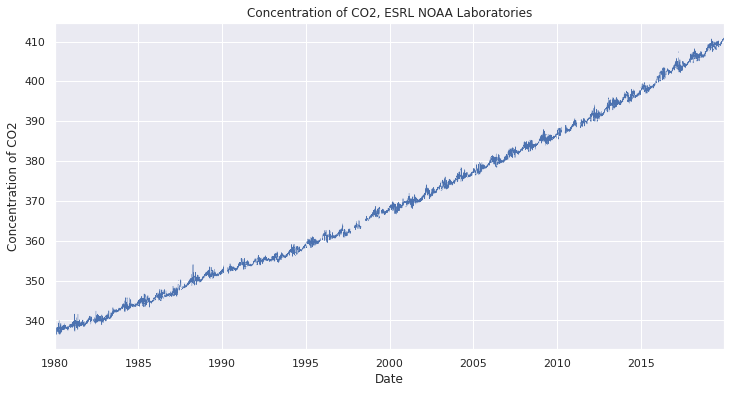

In [265]:
df_80 = df_dist[(df_dist['Year'] >= 1980) & (df_dist['Year'] < 2020)]

sns.set(rc={'figure.figsize':(12, 6)})
df_80['Value'].plot(linewidth=0.5);
plt.ylabel('Concentration of CO2');
plt.title('Concentration of CO2, ESRL NOAA Laboratories')

we use *ts_test.ffill(axis = 0, inplace=True)* to fill the NaN values in base at the previous value

In [266]:
df_80.ffill(axis = 0, inplace=True)

df_80.info()
print(df_80.head())
print(df_80.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14609 entries, 1980-01-01 to 2019-12-30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Value          14609 non-null  float64
 1   std_dev_Value  14609 non-null  float64
 2   Year           14609 non-null  int64  
 3   Month          14609 non-null  int64  
 4   Day            14609 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 684.8 KB
             Value  std_dev_Value  Year  Month  Day
Date                                               
1980-01-01  337.25           0.20  1980      1    1
1980-01-02  337.25           0.12  1980      1    2
1980-01-03  337.56           0.13  1980      1    3
1980-01-04  337.69           0.12  1980      1    4
1980-01-05  337.83           0.09  1980      1    5
             Value  std_dev_Value  Year  Month  Day
Date                                               
2019-12-26  410.89           0.05  2019     12 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Text(0.5, 1.0, 'Concentration of CO2, ESRL NOAA Laboratories')

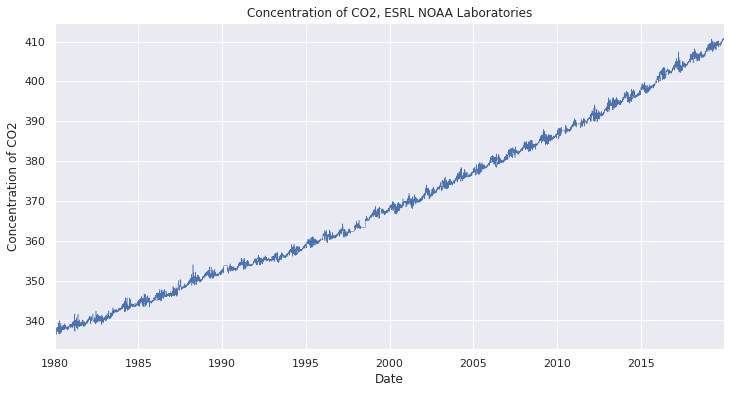

In [267]:
sns.set(rc={'figure.figsize':(12, 6)})
df_80['Value'].plot(linewidth=0.5);
plt.ylabel('Concentration of CO2');
plt.title('Concentration of CO2, ESRL NOAA Laboratories')

### **PART 2**

the function to test stationarity using the Advanced Dickey-Fuller Test

In [268]:
def test_stationarity(df_ts):
    
    #Determinar la Estadística de promedios móviles
    rolmean = df_ts.rolling(window=365, center=True).mean()
    rolstd = df_ts.rolling(window=365, center=True).std() 
    
    # Define el tamaño de la figura
    plt.rcParams["figure.figsize"] = (12,6)

    #Graficar la Estadística de promedios móviles 
    plt.plot(df_ts, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Promedio móvil')
    plt.plot(rolstd, color='black', label = 'Desviación estándar móvil')
 
    plt.legend(loc='best')
    plt.title('Promedio Móvil y Desviación Estándar')
    plt.grid()
    plt.show()
 
    #Realiza la Prueba Aumentada de  Dickey-Fuller:
    print('Resultados de la Prueba de Dickey-Fuller:')
    dftest = adfuller(df_ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Estadístico','valor P','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Valor Crítico (%s)'%key] = value
    print(dfoutput)

Let's test the stationarity of our series time

In [269]:
start, end = '1980-01', '2019-12'  

trial_period = df_80.loc[start:end].copy()

#We use only Value column as
trial_period = trial_period['Value']
trial_period.ffill(axis = 0, inplace=True)
trial_period.head()
trial_period.tail()

Date
2019-12-26    410.89
2019-12-27    410.89
2019-12-28    410.89
2019-12-29    410.89
2019-12-30    410.89
Name: Value, dtype: float64

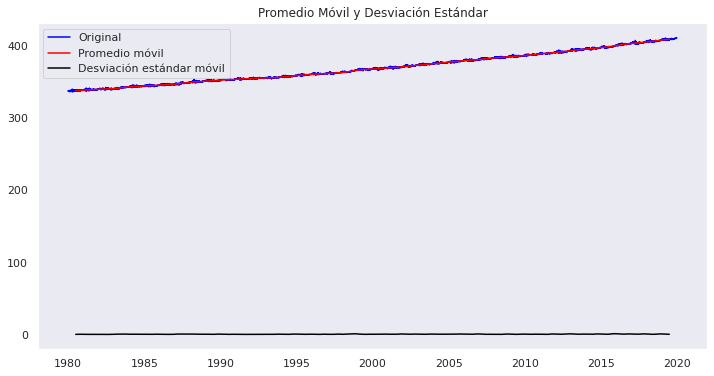

Resultados de la Prueba de Dickey-Fuller:
Test Estadístico                   1.350431
valor P                            0.996877
#Lags Used                        39.000000
Number of Observations Used    14569.000000
Valor Crítico (1%)                -3.430799
Valor Crítico (5%)                -2.861738
Valor Crítico (10%)               -2.566876
dtype: float64


In [270]:
#Let's the test
test_stationarity(trial_period)

The P-value indicates non-stationarity, thus we will use a logaritmic scale

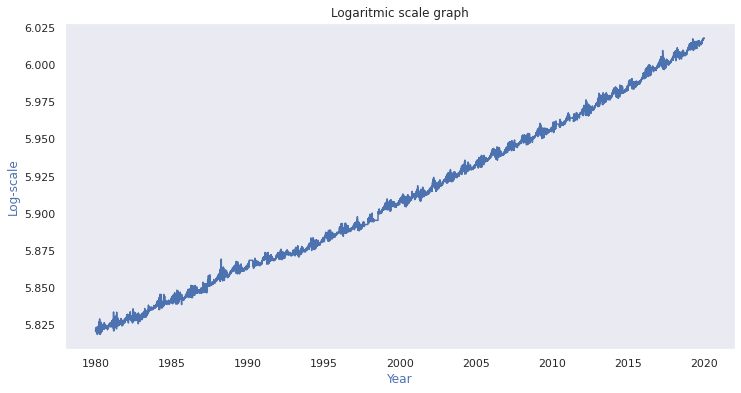

In [271]:
trial_period_ln = np.log(trial_period)
plt.plot(trial_period_ln)
plt.xlabel('Year',color='b')
plt.ylabel('Log-scale',color='b')
plt.title('Logaritmic scale graph')
plt.grid()
plt.show();

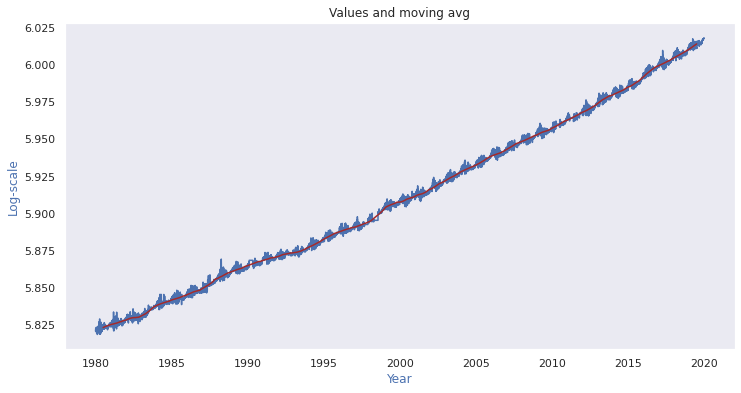

In [272]:
## Let's plot the 365-day moving average to see the contrast with the values observed. And see if the trends improve a bit to be constant
avg_movil = trial_period_ln.rolling(365, center=True).mean()
plt.plot(trial_period_ln)
plt.plot(avg_movil, color = 'brown')
plt.xlabel('Year',color='b')
plt.ylabel('Log-scale',color='b')
plt.title('Values and moving avg')
plt.grid()
plt.show();

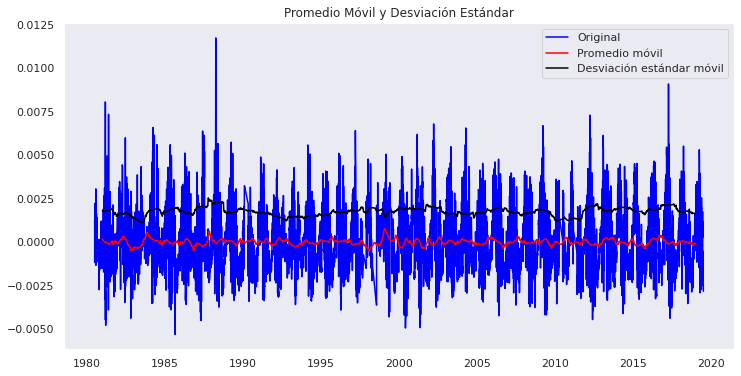

Resultados de la Prueba de Dickey-Fuller:
Test Estadístico              -1.281089e+01
valor P                        6.450276e-24
#Lags Used                     2.800000e+01
Number of Observations Used    1.421600e+04
Valor Crítico (1%)            -3.430810e+00
Valor Crítico (5%)            -2.861743e+00
Valor Crítico (10%)           -2.566878e+00
dtype: float64


In [273]:
trial_period_ln_moving_ave_diff = trial_period_ln - avg_movil  #To move at 0

trial_period_ln_moving_ave_diff.dropna(inplace=True)
# Let's the test again
test_stationarity(trial_period_ln_moving_ave_diff)

The P-value it's great, as it is less than 5% the time series is stationary.
Now, let's to make an stational descompose of time series

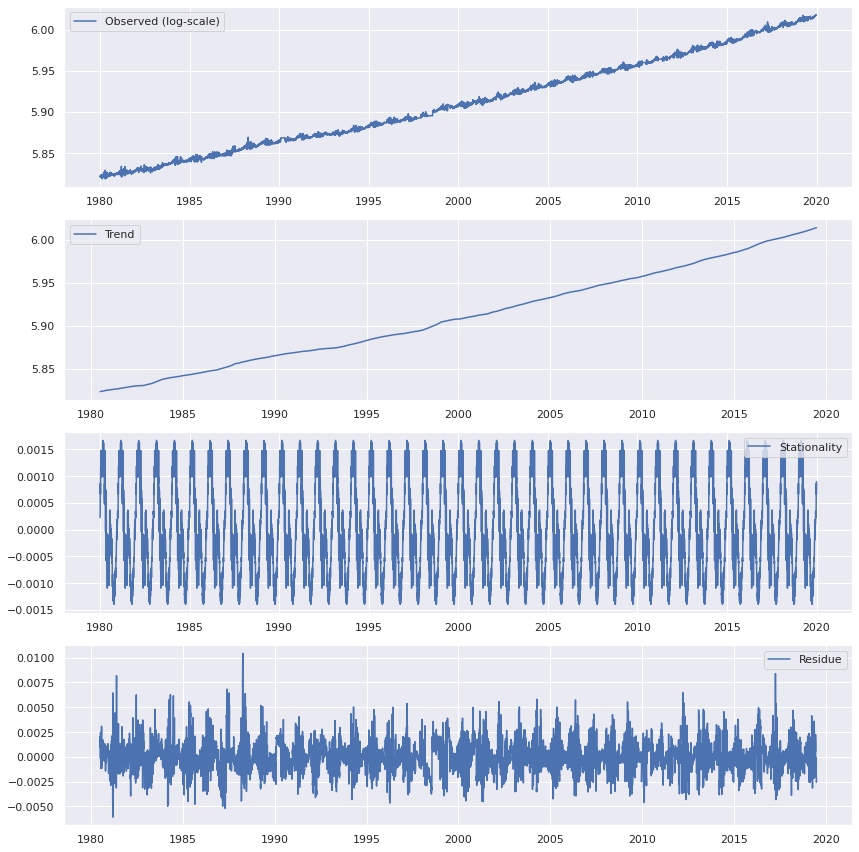

In [274]:
# descompose method using statsmodels.tsa

stational_decomposition = sm.tsa.seasonal_decompose(trial_period_ln.interpolate(), model='additive', freq=365)

# 3 components: trend, seasonality, residue

trend = stational_decomposition.trend
seasonality = stational_decomposition.seasonal
residue = stational_decomposition.resid

# Graph the components
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(411)
plt.plot(trial_period_ln, label='Observed (log-scale)')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonality, label='Stationality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residue, label='Residue')
plt.legend(loc='best')

# decrease the space between graphs
plt.tight_layout();

* the trend is increasing, this is a principal cause of greenhouse effect.
* seeing the stationality, we can realize that the accumulation of co2 depends on the season of the year
* the remainder always shows strange values because it is the rest of the components that define the series

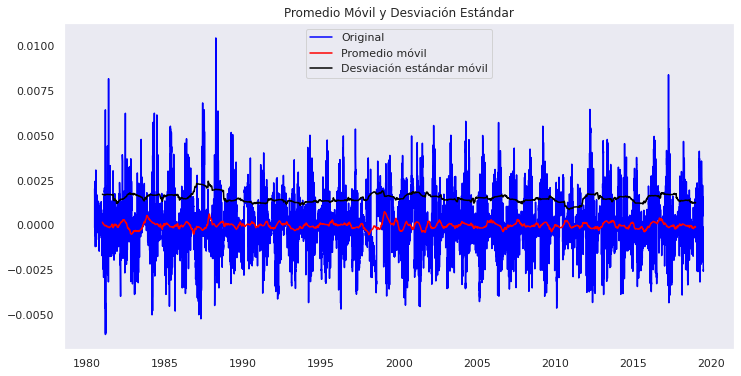

Resultados de la Prueba de Dickey-Fuller:
Test Estadístico              -1.816493e+01
valor P                        2.455691e-30
#Lags Used                     2.100000e+01
Number of Observations Used    1.422300e+04
Valor Crítico (1%)            -3.430810e+00
Valor Crítico (5%)            -2.861743e+00
Valor Crítico (10%)           -2.566878e+00
dtype: float64


In [275]:
# Let's to check if the residue is stationarity

trial_period_residue_decompose = residue 
trial_period_residue_decompose.dropna(inplace=True)
test_stationarity(trial_period_residue_decompose)

Our graph of residue is stationarity

Now, we will use the *shift* function to see if is possible create a stationarity time series with it.

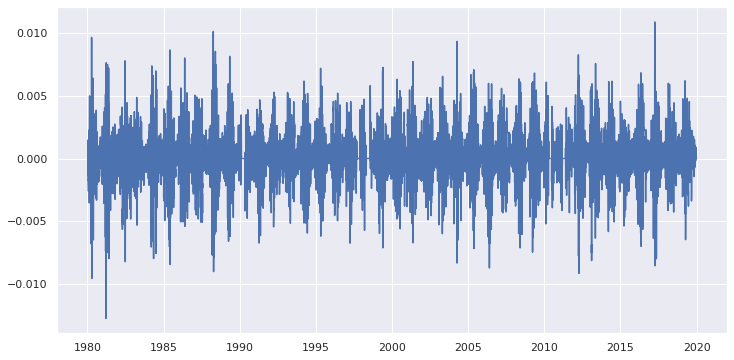

In [276]:
# Diferenciamos usando la función df.shift()
trial_period_ln_diff = trial_period_ln - trial_period_ln.shift(periods=7)
plt.plot(trial_period_ln_diff);

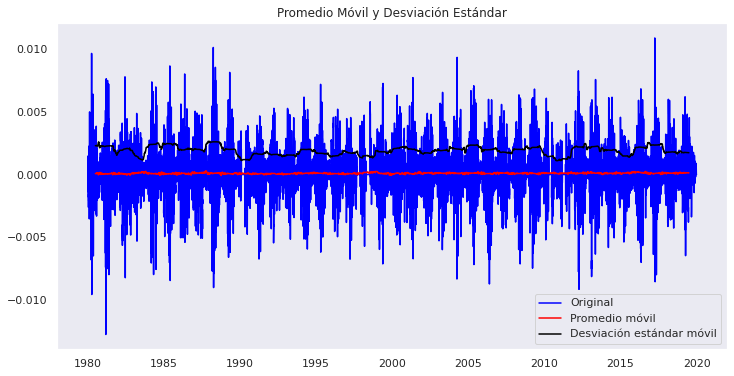

Resultados de la Prueba de Dickey-Fuller:
Test Estadístico                 -22.688301
valor P                            0.000000
#Lags Used                        42.000000
Number of Observations Used    14559.000000
Valor Crítico (1%)                -3.430799
Valor Crítico (5%)                -2.861739
Valor Crítico (10%)               -2.566876
dtype: float64


In [277]:
trial_period_ln_diff.dropna(inplace=True)
test_stationarity(trial_period_ln_diff)

The P-value is optimal. We have a stationarity timeseries

Now, we construct an ARIMA model with d=1. 
First, we must calculate *p* and *q* as

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


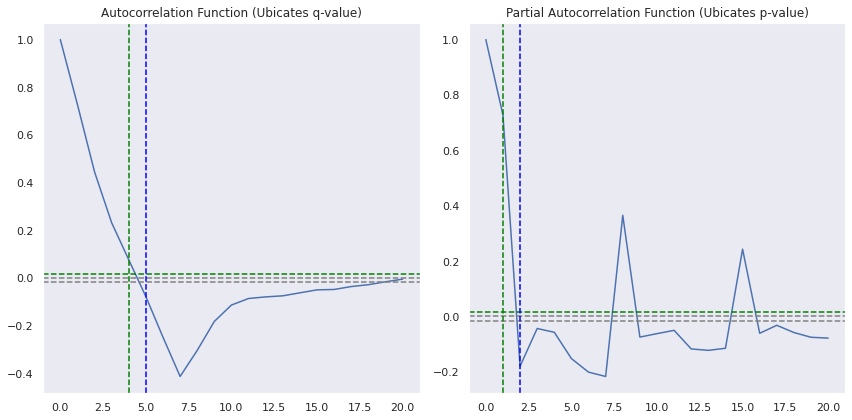

In [278]:
lag_acf = acf(trial_period_ln_diff, nlags=20)
lag_pacf = pacf(trial_period_ln_diff, nlags=20, method = 'ols')

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trial_period_ln_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(trial_period_ln_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=4, linestyle='--', color='green')
plt.axvline(x=5, linestyle='--', color='blue')
plt.grid()
plt.title('Autocorrelation Function (Ubicates q-value)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(trial_period_ln_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(trial_period_ln_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=1, linestyle='--', color='green')
plt.axvline(x=2, linestyle='--', color='blue')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubicates p-value)')

plt.tight_layout()

* In the first graph, we see two lines, a green and a blue. The green line is equal to 4 and the blue line is equal to 5. We consider **q=4** since the closest integer value is 4. 
* In second graph, the same situation with the lines. Here, we consider **p=2** since the closest integer value is 2.

**First model**, AR(p).

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                14608
Model:                 ARIMA(2, 1, 0)   Log Likelihood               80354.906
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 24 Feb 2021   AIC                        -160701.813
Time:                        23:04:47   BIC                        -160671.456
Sample:                    01-02-1980   HQIC                       -160691.728
                         - 12-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.351e-05   7.12e-06      1.897      0.058   -4.46e-07    2.75e-05
ar.L1.D.Value    -0.0003      0.008     -0.033      0.974      -0.016       0.016
ar.L2.D.Value    -0.1478      0.008    -

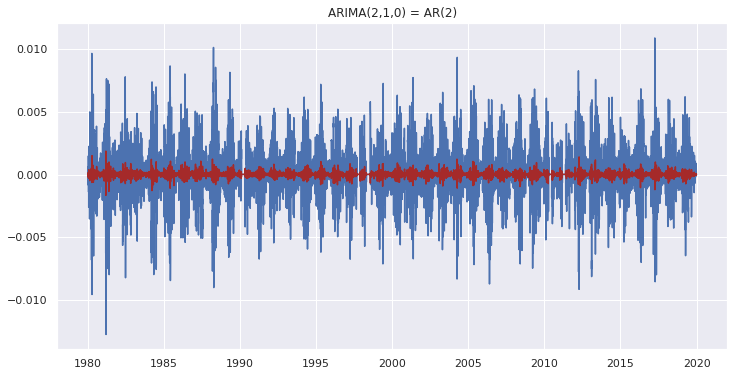

In [279]:
# Model AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(trial_period_ln, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(trial_period_ln_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

**Second model**, MA(q)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                14608
Model:                 ARIMA(0, 1, 4)   Log Likelihood               80867.009
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 24 Feb 2021   AIC                        -161722.017
Time:                        23:04:49   BIC                        -161676.482
Sample:                    01-02-1980   HQIC                       -161706.890
                         - 12-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.347e-05   2.35e-06      5.725      0.000    8.86e-06    1.81e-05
ma.L1.D.Value    -0.0998      0.008    -12.143      0.000      -0.116      -0.084
ma.L2.D.Value    -0.2501      0.008    -

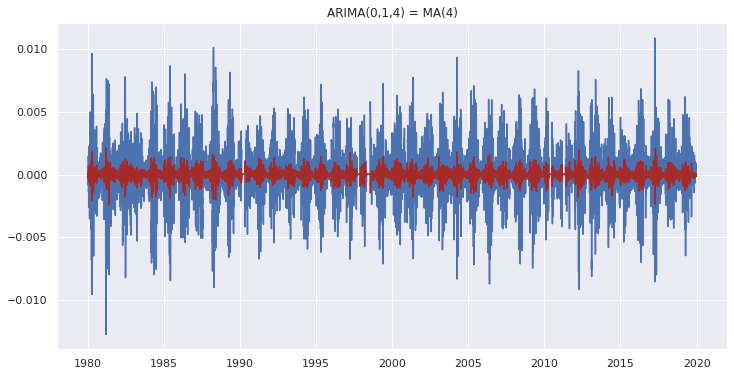

In [280]:
# Modelo MA(q): (p,d,q) = (0,1,4) 
model = ARIMA(trial_period_ln, order=(0,1,4), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(trial_period_ln_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

**Third model**, ARIMA (p,d,q)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                14608
Model:                 ARIMA(2, 1, 4)   Log Likelihood               80967.189
Method:                       css-mle   S.D. of innovations              0.001
Date:                Wed, 24 Feb 2021   AIC                        -161918.377
Time:                        23:05:08   BIC                        -161857.663
Sample:                    01-02-1980   HQIC                       -161898.207
                         - 12-30-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.346e-05   1.84e-06      7.328      0.000    9.86e-06    1.71e-05
ar.L1.D.Value     0.2386        nan        nan        nan         nan         nan
ar.L2.D.Value     0.2258        nan     

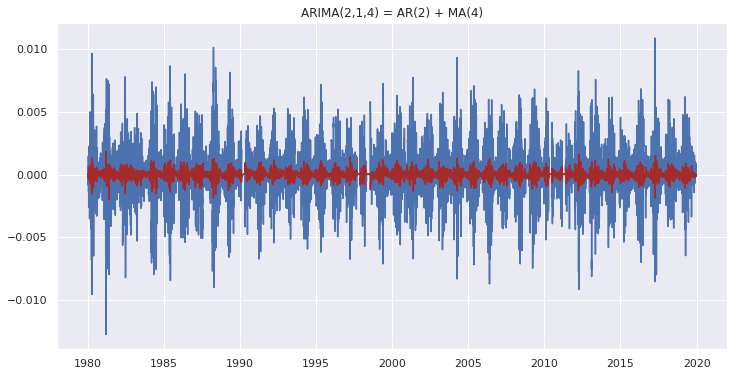

In [281]:
# Modelo ARIMA(p): (p,d,q) = (2,1,4) 
model = ARIMA(trial_period_ln, order=(2,1,4), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(trial_period_ln_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())

According to the AIC the best model in this case is the ARIMA model, because is the model with the minimal AIC value

Now, we use the ARIMA model to construct a time series of predictions

In [282]:
# We define a time series with the predictions obtained by ARIMA method
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Date
1980-01-02    0.000013
1980-01-03    0.000013
1980-01-04    0.000015
1980-01-05   -0.000128
1980-01-06   -0.000189
                ...   
2019-12-26   -0.000080
2019-12-27   -0.000070
2019-12-28   -0.000061
2019-12-29   -0.000052
2019-12-30   -0.000044
Length: 14608, dtype: float64


In [283]:
# We add the ARIMA predictions to the observed series
predictions_ARIMA_ln = pd.Series(trial_period_ln, index = trial_period_ln.index)
predictions_ARIMA_ln = predictions_ARIMA_ln.add(predictions_ARIMA_diff)
print(predictions_ARIMA_ln.head())
print(predictions_ARIMA_ln.tail())

Date
1980-01-01         NaN
1980-01-02    5.820838
1980-01-03    5.821757
1980-01-04    5.822143
1980-01-05    5.822415
dtype: float64
Date
2019-12-26    6.018246
2019-12-27    6.018256
2019-12-28    6.018265
2019-12-29    6.018273
2019-12-30    6.018281
dtype: float64


Let's compare the observed series with the ARIMA predictions series

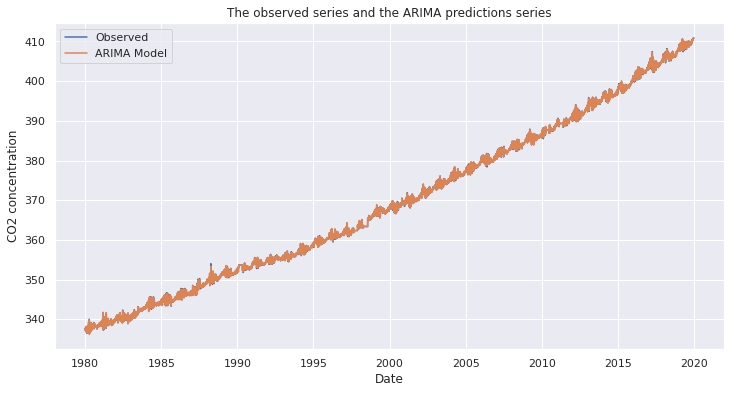

In [284]:
# Regresamos a la escala de Temperatura original 
predictions_ARIMA = np.e**(predictions_ARIMA_ln)
# Graficamos la serie original y las predicciones con ARIMA

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(trial_period, label='Observed');
plt.plot(predictions_ARIMA, label='ARIMA Model');
plt.xlabel('Date')
plt.ylabel('CO2 concentration')
plt.title('The observed series and the ARIMA predictions series')
plt.legend(loc='best');

We can see that the predictions are great.

We can calculate quadratic error as

In [285]:
RMSE = np.sqrt(np.mean((predictions_ARIMA - trial_period)**2))
print('RMSE:', RMSE)

RMSE: 0.11565744375847634


And finally, we compare the last five years of observed data and predictions to see the closest contrast

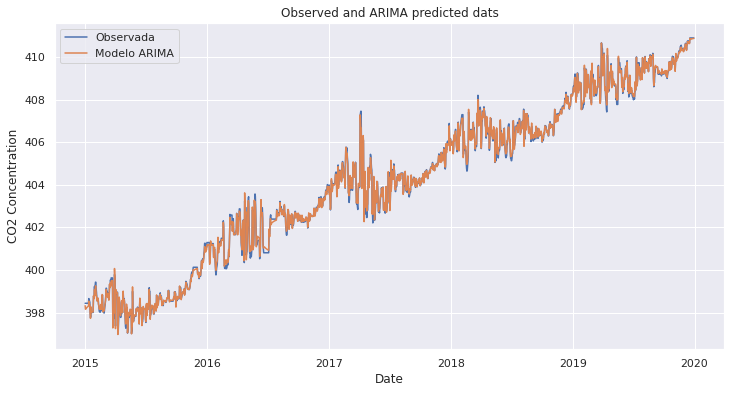

In [286]:
trial_period_last = trial_period.tail(1825)  ## 365 * 5 is the number of data for five years
predictions_ARIMA_last = predictions_ARIMA.tail(1825)
plt.plot(trial_period_last, label='Observada');
plt.plot(predictions_ARIMA_last, label='Modelo ARIMA');
plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.title('Observed and ARIMA predicted dats')
plt.legend(loc='best');

And that's it.

* Humberto Eduardo Meza Ruiz